In [1]:
### Market Basket Analysis on Groceries Data using Apriori Algorithm.

### Importing the required libraries.

import numpy as np
import pandas as pd
import matplotlib as mp
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori as ap
from mlxtend.frequent_patterns import association_rules as ar
import seaborn as sns



In [2]:
## Let's importing the dataset.
items_data_df = pd.read_csv('/content/Market_Basket_Optimisation.csv', header=None)
items_data_df.head()




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
## Majority of the records have Na or NaN. Let's analyze how many unique values we have.
unique_items = (items_data_df[0].unique())
print(unique_items)



['shrimp' 'burgers' 'chutney' 'turkey' 'mineral water' 'low fat yogurt'
 'whole wheat pasta' 'soup' 'frozen vegetables' 'french fries' 'eggs'
 'cookies' 'spaghetti' 'meatballs' 'red wine' 'rice' 'parmesan cheese'
 'ground beef' 'sparkling water' 'herb & pepper' 'pickles' 'energy bar'
 'fresh tuna' 'escalope' 'avocado' 'tomato sauce' 'clothes accessories'
 'energy drink' 'chocolate' 'grated cheese' 'yogurt cake' 'mint'
 'asparagus' 'champagne' 'ham' 'muffins' 'french wine' 'chicken' 'pasta'
 'tomatoes' 'pancakes' 'frozen smoothie' 'carrots' 'yams' 'shallot'
 'butter' 'light mayo' 'pepper' 'candy bars' 'cooking oil' 'milk'
 'green tea' 'bug spray' 'oil' 'olive oil' 'salmon' 'cake' 'almonds'
 'salt' 'strong cheese' 'hot dogs' 'pet food' 'whole wheat rice'
 'antioxydant juice' 'honey' 'sandwich' 'salad' 'magazines' 'protein bar'
 'mayonnaise' 'cider' 'burger sauce' 'green grapes' 'vegetables mix'
 'bramble' 'nonfat milk' 'tomato juice' 'green beans' 'strawberries'
 'eggplant' 'mushroom cre

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
## Based on the unique items we got, we will perform one-hot-encoding.
## The dataset will be converted to a format that has just 0s or 1s. It can also have True or False.
## Custom One Hot Encoding

encoded_vals = []
for i, rows in items_data_df.iterrows():
	labels = {}
	uncommons = list(set(unique_items) - set(rows))
	commons = list(set(unique_items).intersection(rows))
	for uc in uncommons:
		labels[uc] = 0
	for com in commons:
		labels[com] = 1
	encoded_vals.append(labels)
encoded_vals[0]

encode_df = pd.DataFrame(encoded_vals)

print(encode_df.head())



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   meatballs  carrots  eggplant  rice  butter  mashed potato  cream  \
0          0        0         0     0       0              0      0   
1          1        0         0     0       0              0      0   
2          0        0         0     0       0              0      0   
3          0        0         0     0       0              0      0   
4          0        0         0     0       0              0      0   

   protein bar  soda  light mayo  ...  spinach  tomato juice  \
0            0     0           0  ...        1             1   
1            0     0           0  ...        0             0   
2            0     0           0  ...        0             0   
3            0     0           0  ...        0             0   
4            0     0           0  ...        0             0   

   whole weat flour  antioxydant juice  energy drink  olive oil  \
0                 1                  1             1          1   
1                 0                  0             0  

In [10]:
# Task 02: EDA
product_counts = encode_df.sum()
popular_products = product_counts.sort_values(ascending=False)
popular_products

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


mineral water      1788
eggs               1348
spaghetti          1306
french fries       1282
chocolate          1229
                   ... 
chocolate bread      32
chutney              31
mashed potato        31
bramble              14
cream                 7
Length: 115, dtype: int64

In [5]:
## Defining the apriori algorithm.
freq_items = ap(encode_df, min_support=0.0085, use_colnames=True, verbose=1, low_memory=False)
print(freq_items.head())



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Processing 152 combinations | Sampling itemset size 4
    support     itemsets
0  0.020931  (meatballs)
1  0.015331    (carrots)
2  0.013198   (eggplant)
3  0.018797       (rice)
4  0.030129     (butter)


In [6]:
## Defining the association rules algorithms to match and find similar items together based on confidence.
assocn_rules_conf = ar(freq_items, metric="confidence", min_threshold=0.25)
print(assocn_rules_conf)



                      antecedents      consequents  antecedent support  \
0                       (burgers)           (eggs)            0.087188   
1                       (burgers)   (french fries)            0.087188   
2                       (burgers)  (mineral water)            0.087188   
3                      (tomatoes)      (spaghetti)            0.068391   
4                      (tomatoes)  (mineral water)            0.068391   
..                            ...              ...                 ...   
132  (ground beef, mineral water)      (spaghetti)            0.040928   
133           (shrimp, spaghetti)  (mineral water)            0.021197   
134       (shrimp, mineral water)      (spaghetti)            0.023597   
135        (olive oil, spaghetti)  (mineral water)            0.022930   
136    (olive oil, mineral water)      (spaghetti)            0.027596   

     consequent support   support  confidence      lift  leverage  conviction  \
0              0.179709  0.028

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
## Defining the association rules algorithms to match and find similar items together based on support.
assocn_rules_supp = ar(freq_items, metric="support", min_threshold=0.005)
print(assocn_rules_supp)


                    antecedents                 consequents  \
0                        (eggs)                   (burgers)   
1                     (burgers)                      (eggs)   
2                (french fries)                   (burgers)   
3                     (burgers)              (french fries)   
4                   (chocolate)                   (burgers)   
..                          ...                         ...   
615  (mineral water, spaghetti)                 (olive oil)   
616  (olive oil, mineral water)                 (spaghetti)   
617                 (spaghetti)  (olive oil, mineral water)   
618                 (olive oil)  (mineral water, spaghetti)   
619             (mineral water)      (olive oil, spaghetti)   

     antecedent support  consequent support   support  confidence      lift  \
0              0.179709            0.087188  0.028796    0.160237  1.837830   
1              0.087188            0.179709  0.028796    0.330275  1.837830   
2     

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


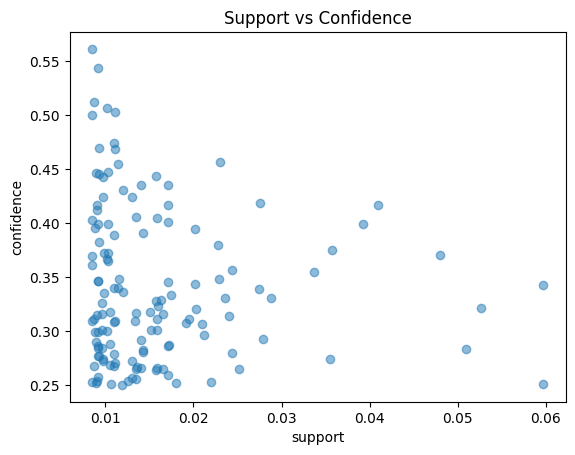

In [8]:
## Plotting the scatter plot of Confidence Vs Support

plt.scatter(assocn_rules_conf['support'], assocn_rules_conf['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


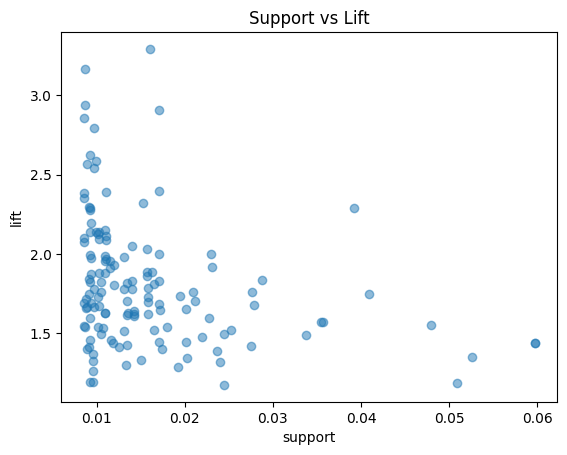

In [9]:
## Plotting the scatter plot of Lift Vs Support

plt.scatter(assocn_rules_conf['support'], assocn_rules_conf['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

In [11]:
# Task 03: Association Rule Mining
min_support = 0.005
min_confidence = 0.25
freq_items = ap(encode_df, min_support=min_support, use_colnames=True, verbose=1, low_memory=False)
assocn_rules = ar(freq_items, metric="confidence", min_threshold=min_confidence)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Processing 2640 combinations | Sampling itemset size 4


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


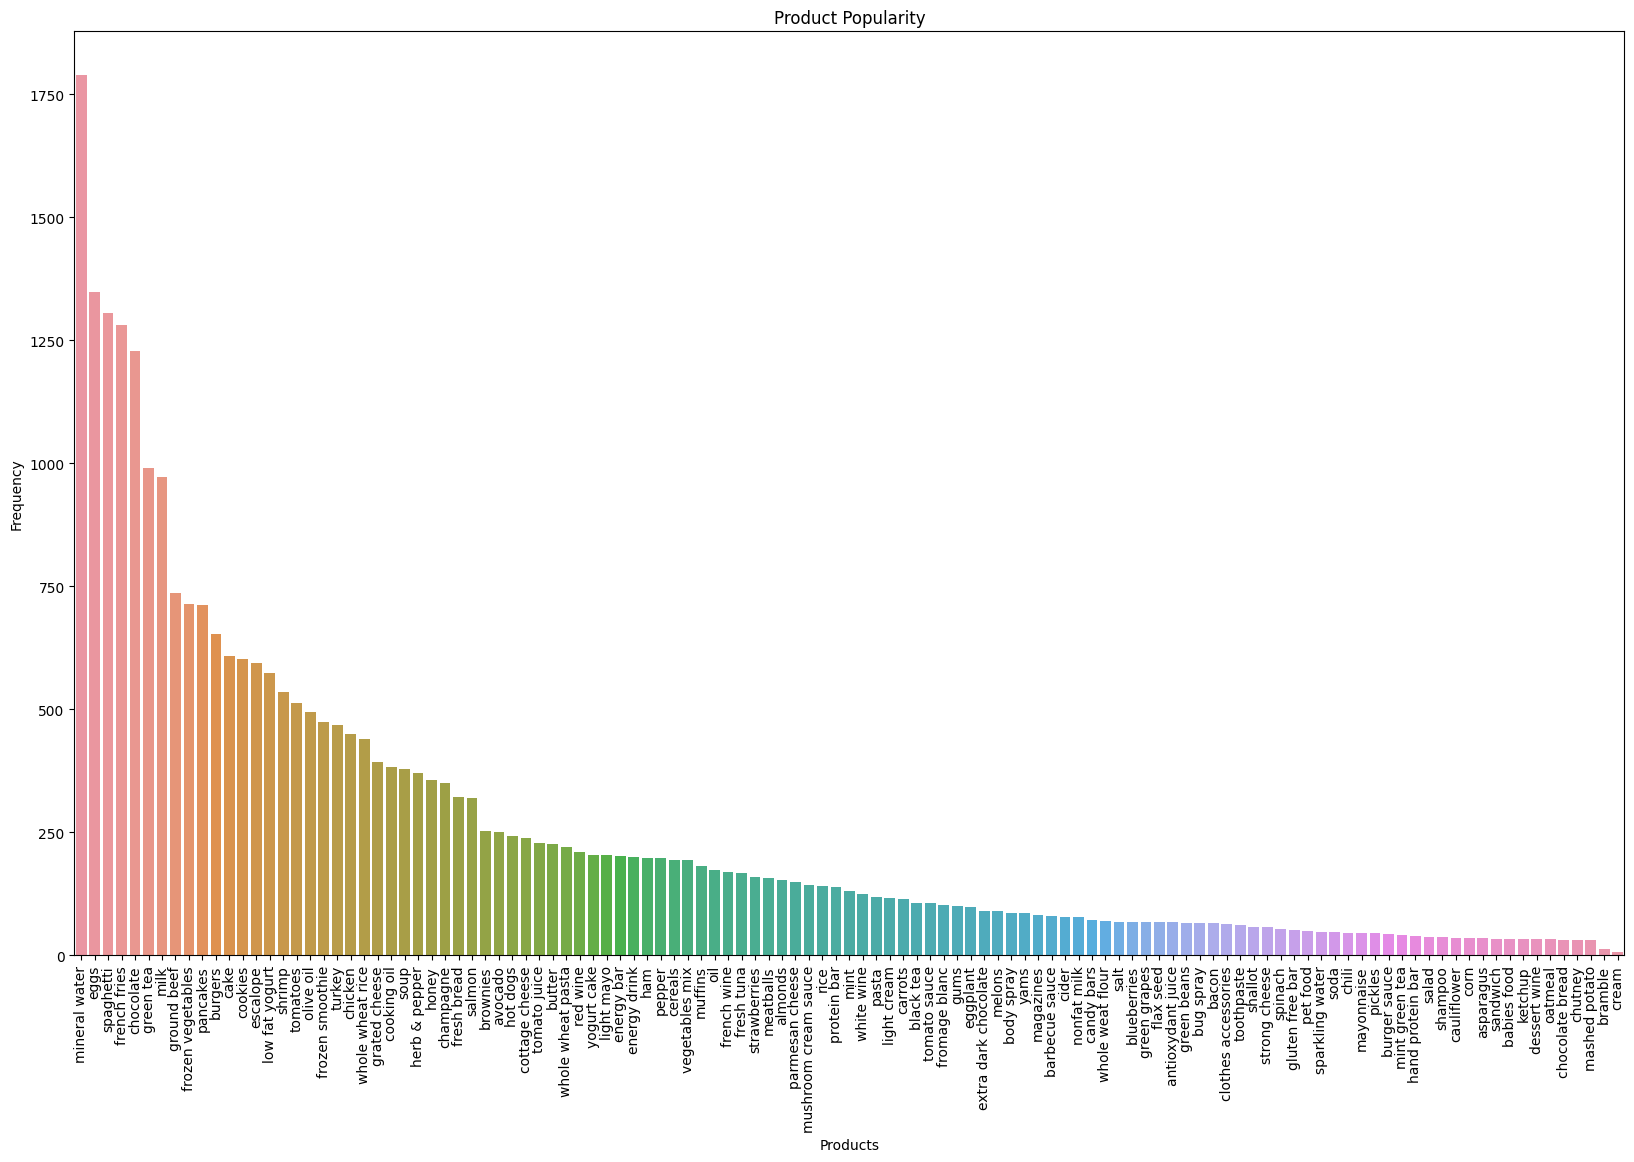

In [23]:
 #Task 04: Visualization
# Product Popularity Bar Chart
plt.figure(figsize=(20, 12))
sns.barplot(x=popular_products.index, y=popular_products.values)
plt.xticks(rotation=90)
plt.title("Product Popularity")
plt.xlabel("Products")
plt.ylabel("Frequency")
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


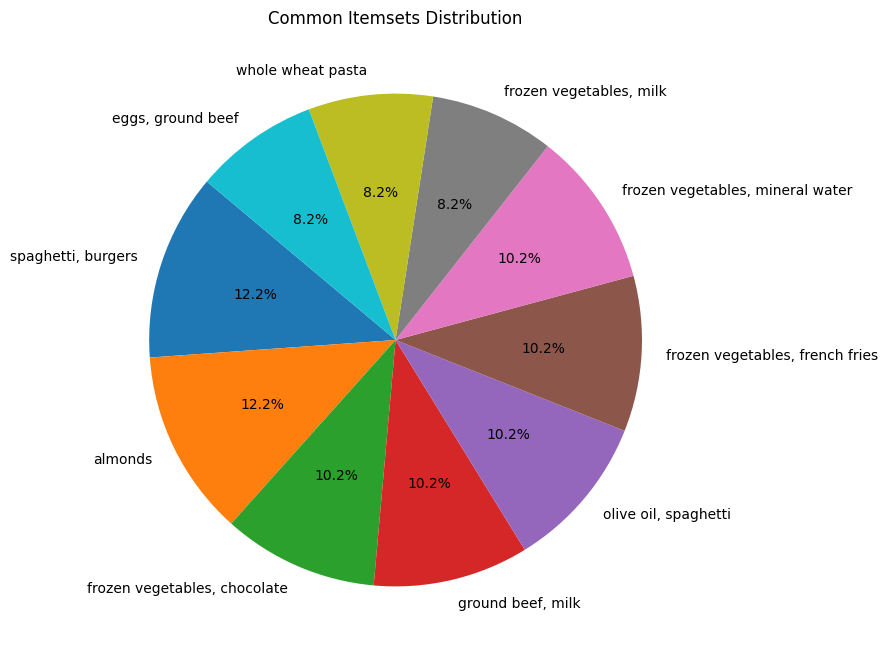

In [13]:
# Defining the association rules algorithms to match and find similar items together based on confidence.
assocn_rules = ar(freq_items, metric="confidence", min_threshold=min_confidence)

# Common Itemsets Pie Chart
common_itemsets = assocn_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
common_itemsets_counts = common_itemsets.value_counts().head(10)

plt.figure(figsize=(8, 8))
plt.pie(common_itemsets_counts, labels=common_itemsets_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Common Itemsets Distribution")
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


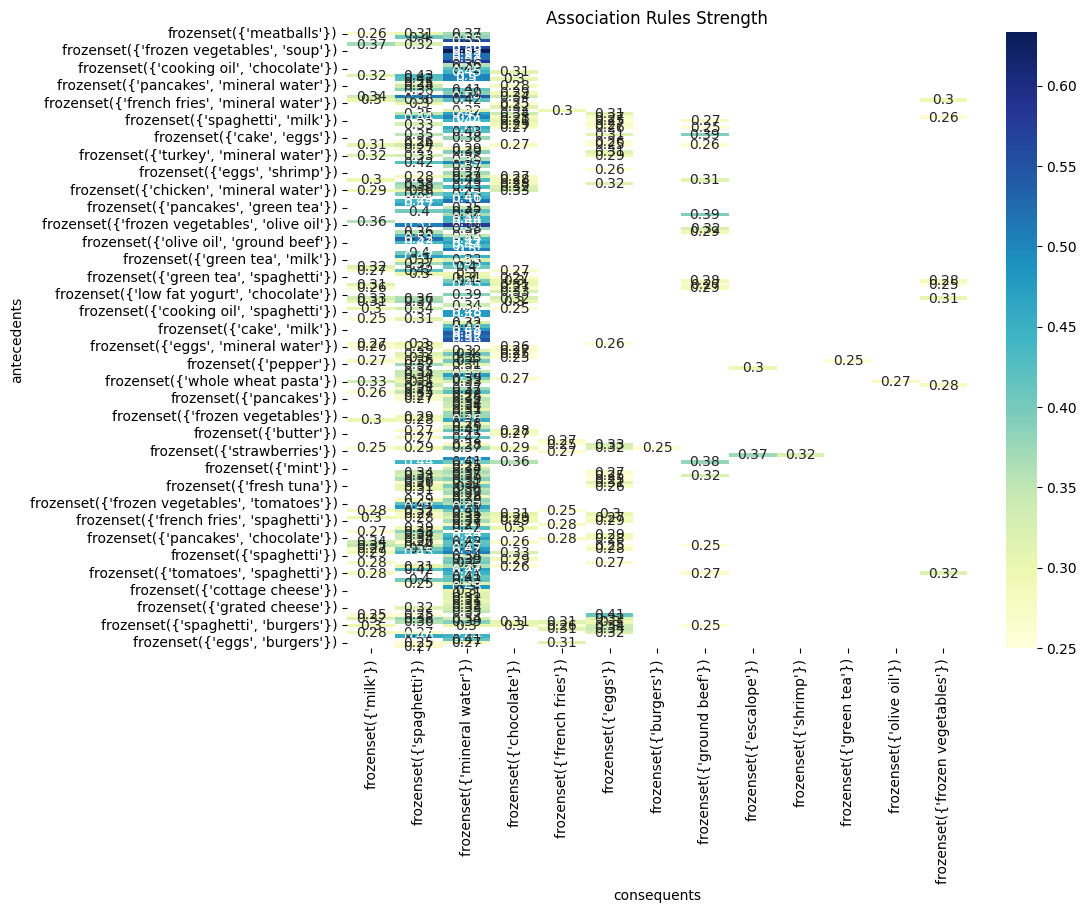

In [14]:
# Association Rules Heatmap
pivot_table = assocn_rules.pivot(index='antecedents', columns='consequents', values='confidence')
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")
plt.title("Association Rules Strength")
plt.show()

In [17]:
min_confidence_threshold = 0.7
cross_selling_rules = assocn_rules[assocn_rules['confidence'] >= min_confidence_threshold]

# Create a list to store cross-selling opportunities
cross_selling_opportunities = []

# Iterate through the cross-selling rules and append opportunities to the list
for index, row in cross_selling_rules.iterrows():
    antecedents = list(row['antecedents'])
    consequents = list(row['consequents'])
    cross_selling_opportunities.append({
        'antecedents': antecedents,
        'consequents': consequents
    })

# Print or use the cross-selling opportunities list
for opportunity in cross_selling_opportunities:
    antecedents = ', '.join(opportunity['antecedents'])
    consequents = ', '.join(opportunity['consequents'])
    print(f"If customer buys {antecedents}, they are likely to buy {consequents}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


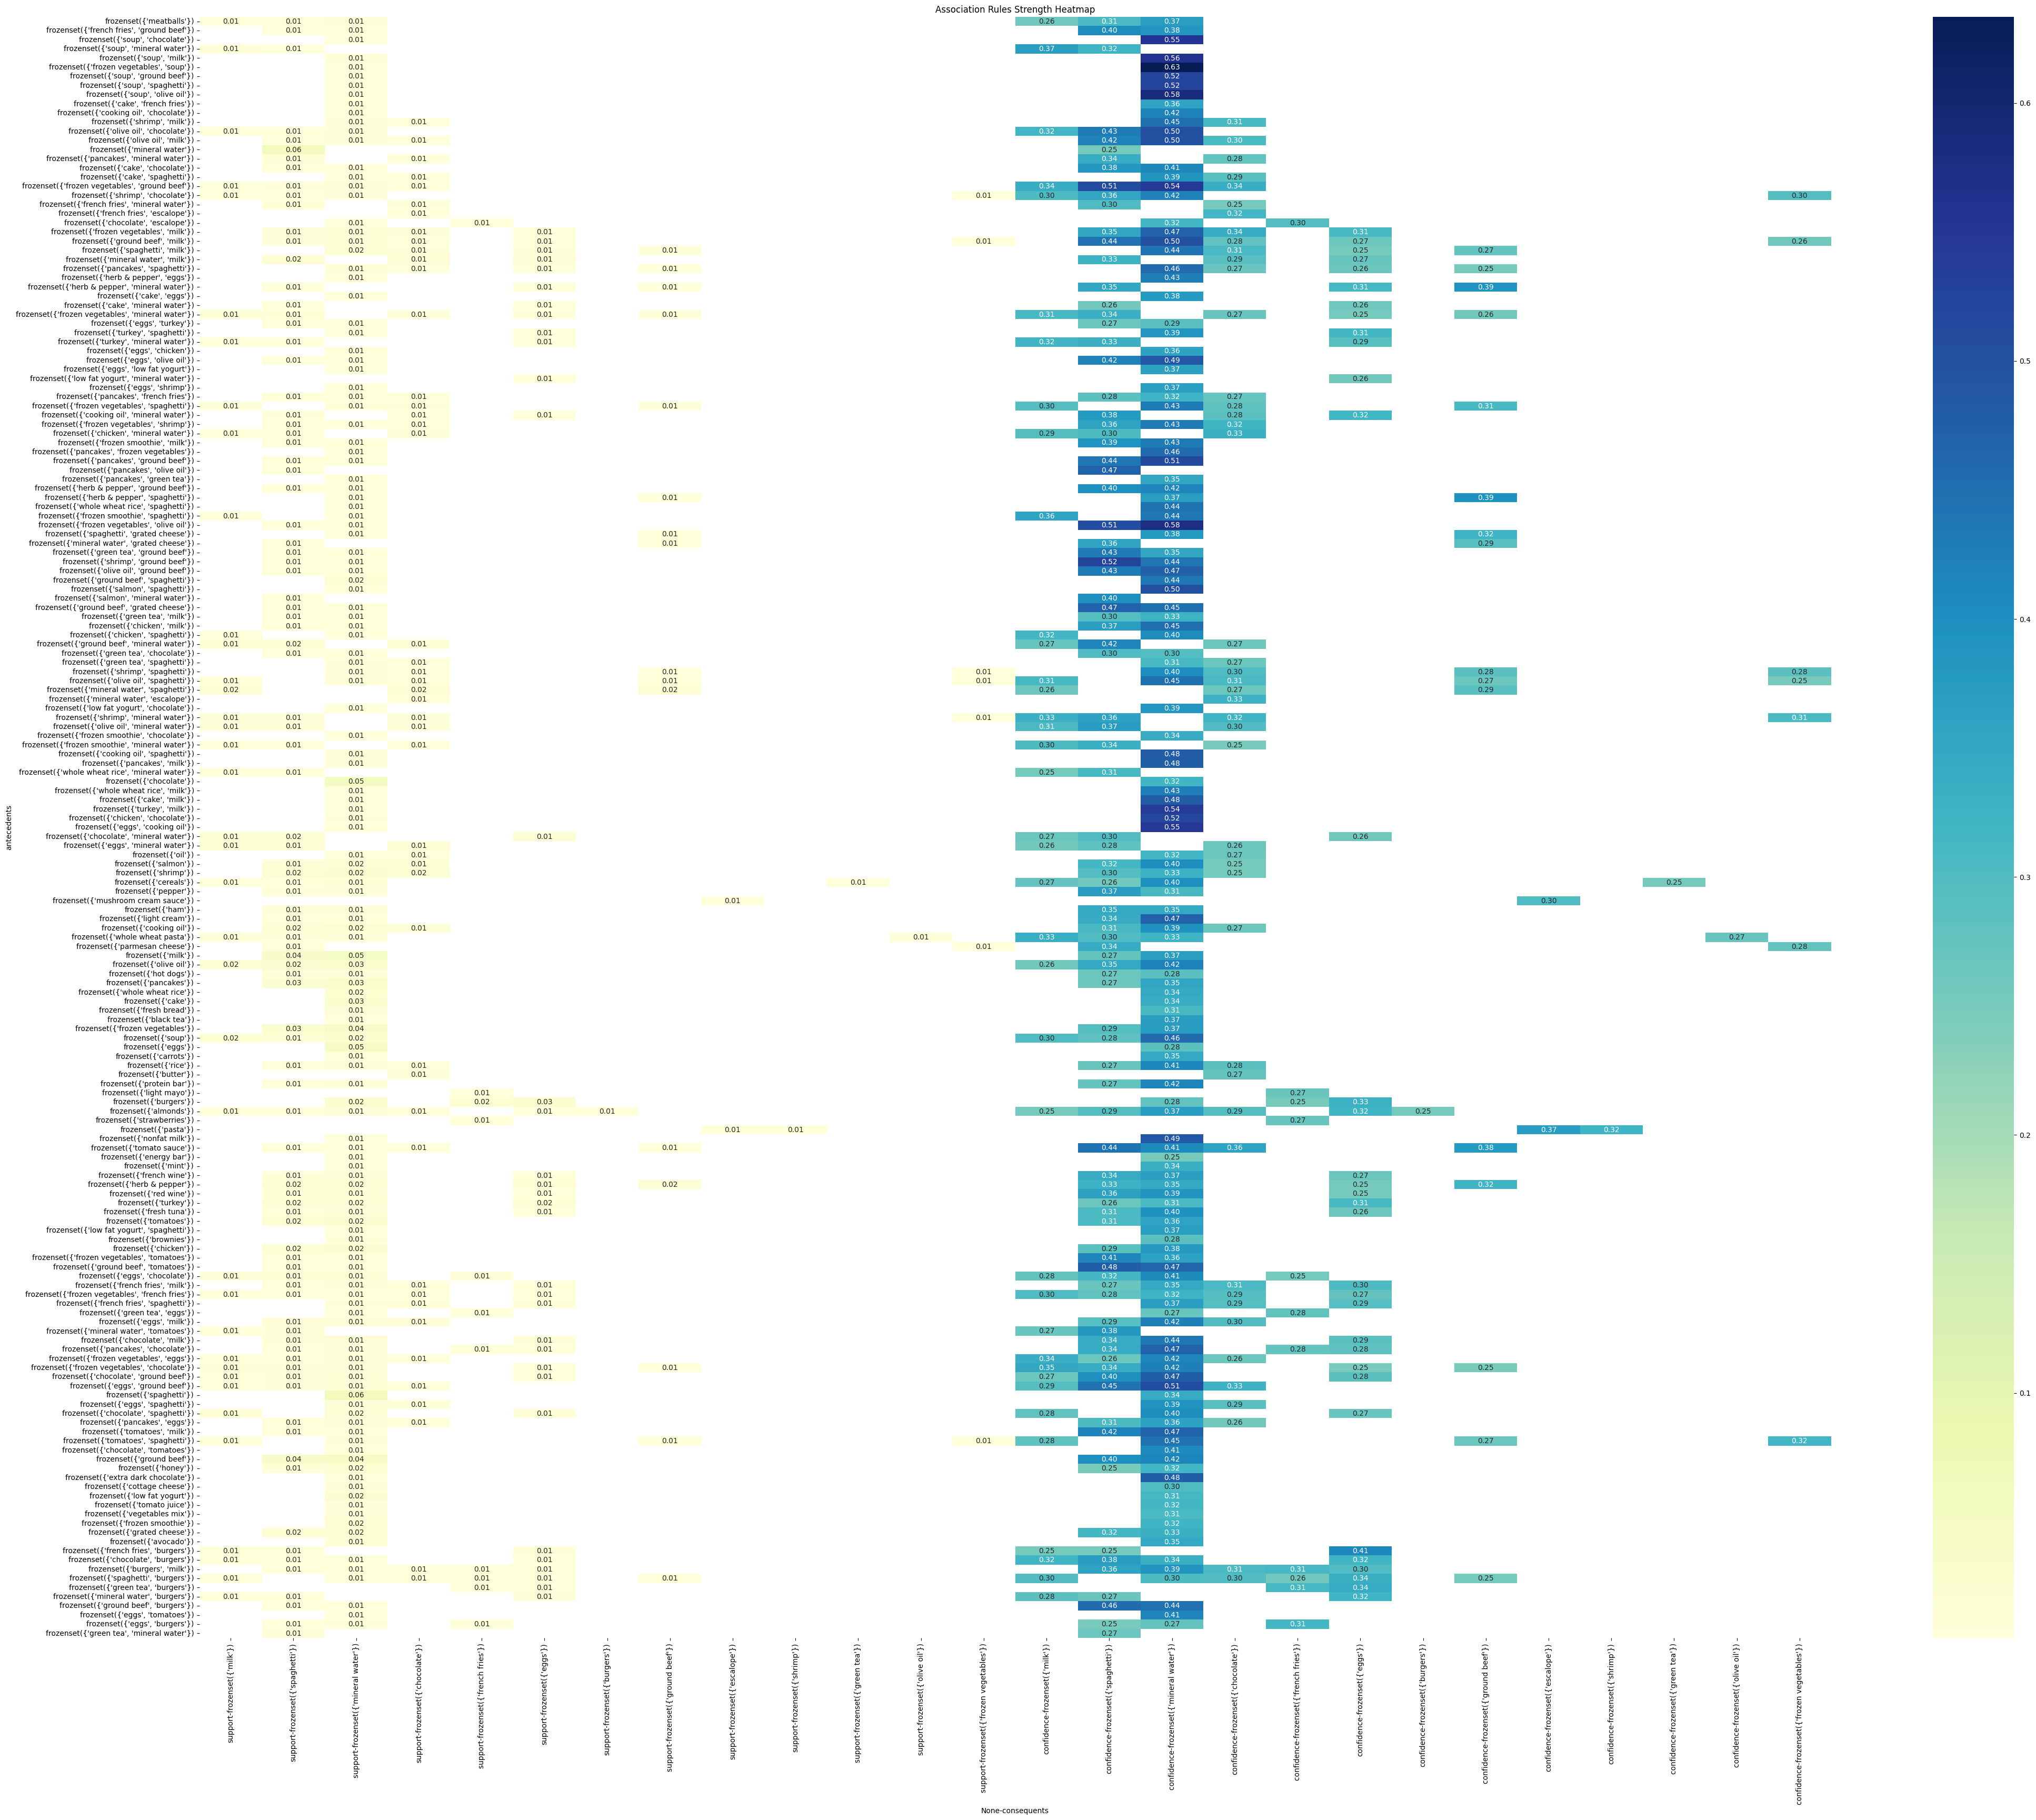

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table for support and confidence values
pivot_table = assocn_rules.pivot(index='antecedents', columns='consequents', values=['support', 'confidence'])

# Set up the heatmap
plt.figure(figsize=(50,40))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Association Rules Strength Heatmap")
plt.show()


In [22]:
import pandas as pd
import numpy as np

# Select high-confidence rules for cross-selling opportunities (you can adjust the threshold as needed)
min_confidence_threshold = 0.7
cross_selling_rules = assocn_rules[assocn_rules['confidence'] >= min_confidence_threshold]

# Create a set of unique products
unique_products = set()
for rule_index, row in cross_selling_rules.iterrows():
    consequents = row['consequents']
    unique_products.update(consequents)

unique_products = sorted(list(unique_products))

# Create an empty cross-selling matrix
cross_selling_matrix = pd.DataFrame(np.zeros((len(unique_products), len(unique_products))),
                                     index=unique_products, columns=unique_products)

# Populate the matrix with cross-selling values
for rule_index, row in cross_selling_rules.iterrows():
    consequents = row['consequents']
    for product1 in consequents:
        for product2 in consequents:
            if product1 != product2:
                cross_selling_matrix.loc[product1, product2] += 1

# Display the cross-selling matrix
print("Cross-Selling Strategy Matrix:")
print(cross_selling_matrix)


Cross-Selling Strategy Matrix:
Empty DataFrame
Columns: []
Index: []


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
